In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [2]:
df = pd.read_csv('updated.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.skew()

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_10328/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age               0.558743
fnlwgt            1.446980
education-num    -0.311676
capital          11.953848
capital.1         4.594629
hours             0.227643
dtype: float64

In [5]:
cols = ['age','fnlwgt','education-num','capital','capital.1','hours']

In [6]:
for col in cols:
    print(col,df[col].skew())

age 0.5587433694130484
fnlwgt 1.4469800945789826
education-num -0.3116758679102297
capital 11.953847687699799
capital.1 4.594629121679692
hours 0.22764253680450092


C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyAnshu\

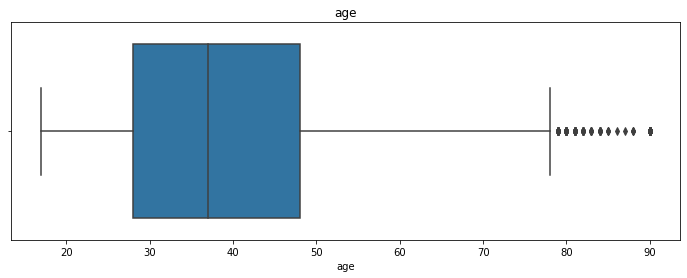

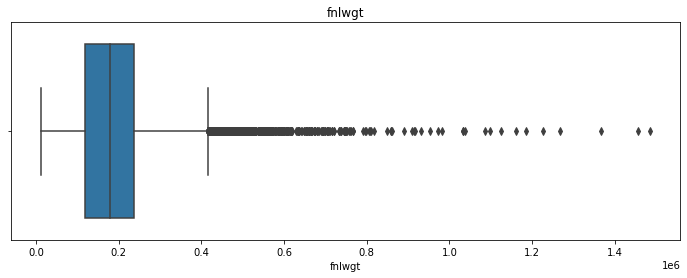

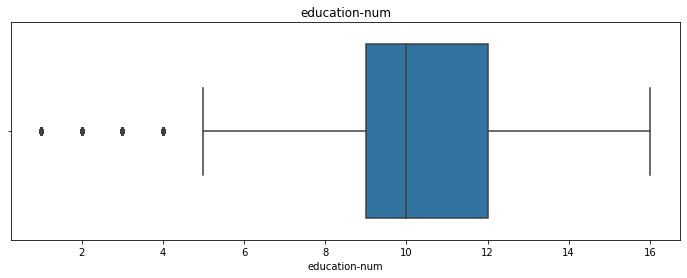

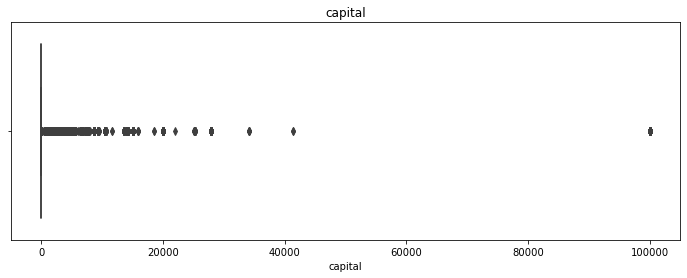

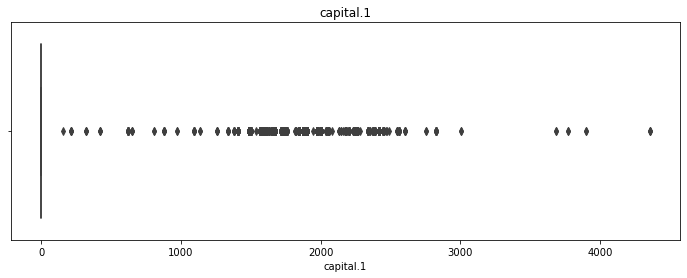

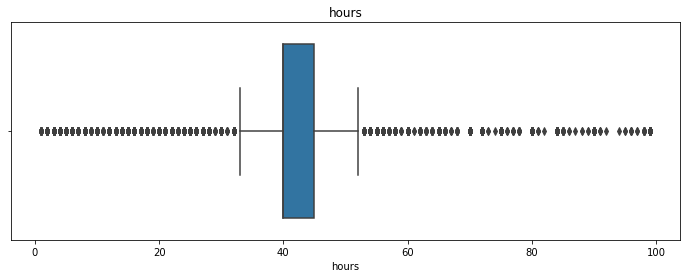

In [7]:
for col in cols:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [13]:
df1 = df.copy()

In [14]:
def detect_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]
    #return df1[df1[col] < lower_limit]

In [15]:
detect_outliers_IQR('age')

percentile25 28.0
percentile75 48.0
Upper limit 78.0
Lower limit -2.0


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


In [16]:
detect_outliers_IQR('fnlwgt')

percentile25 117827.0
percentile75 237051.0
Upper limit 415887.0
Lower limit -61009.0


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


In [17]:
detect_outliers_IQR('education-num')

percentile25 9.0
percentile75 12.0
Upper limit 16.5
Lower limit 4.5


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


In [18]:
detect_outliers_IQR('capital')

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


In [19]:
detect_outliers_IQR('capital.1')

percentile25 0.0
percentile75 0.0
Upper limit 0.0
Lower limit 0.0


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


In [20]:
detect_outliers_IQR('hours')

percentile25 40.0
percentile75 45.0
Upper limit 52.5
Lower limit 32.5


,age,workclass,fnlwgt,education,education-num,marital,occupation,relationship,race,sex,capital,capital.1,hours,country,salary


C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SatyAnshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hist

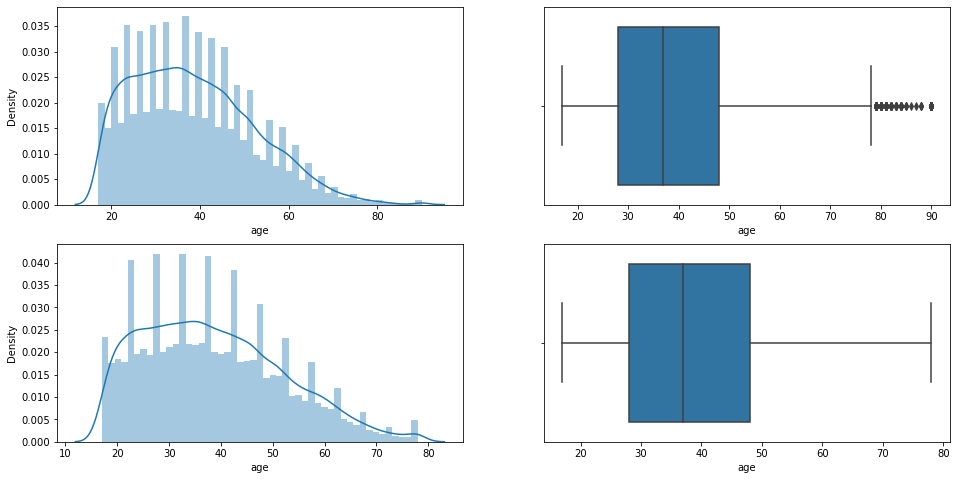

In [21]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['age'])

plt.subplot(2,2,2)
sns.boxplot(df['age'])

plt.subplot(2,2,3)
sns.distplot(df1['age'])

plt.subplot(2,2,4)
sns.boxplot(df1['age'])

plt.show()

In [24]:
# Comapring skewness 

In [22]:
df.skew()

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_10328/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


age               0.558743
fnlwgt            1.446980
education-num    -0.311676
capital          11.953848
capital.1         4.594629
hours             0.227643
dtype: float64

In [23]:
df1.skew()

C:\Users\SATYAN~1\AppData\Local\Temp/ipykernel_10328/149261804.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.skew()


age              0.513887
fnlwgt           0.548313
education-num   -0.034100
capital          0.000000
capital.1        0.000000
hours            0.438298
dtype: float64

In [25]:
# saving csv file
df1.to_csv('outlier_removed.csv')